(113.12911651780063, 120.18650330915247, 35.72038074717382, 42.94378986800807)

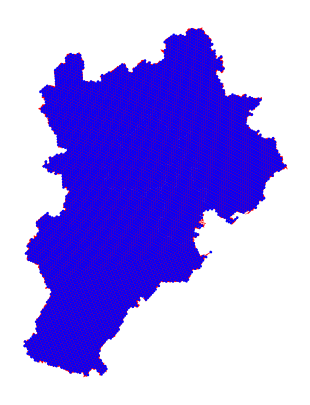

In [1]:
import geopandas as gpd
import h3pandas
import matplotlib.pyplot as plt

gdf = gpd.read_file('京津冀省级.json', encoding='utf-8')
ax = gdf.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf.h3.polyfill_resample(6)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")


In [2]:
import pandas as pd

temp_111 = gdf.h3.polyfill(6)
temp_111

,省,省级码,省类型,ENG_NAME,VAR_NAME,FIRST_GID,FIRST_TYPE,year,geometry,h3_polyfill
0,北京市,110000,直辖市,Beijing,Běi Jīng,110000,Municipality,2022,"POLYGON ((117.38335 40.22647, 117.38089 40.225...","[8631aa497ffffff, 8631ae727ffffff, 8631aa89fff..."
1,天津市,120000,直辖市,Tianjin,Tiān Jīn,120000,Municipality,2022,"POLYGON ((118.02989 39.22145, 118.02989 39.221...","[8631ab4e7ffffff, 863188d0fffffff, 8631ab417ff..."
2,河北省,130000,省,Hebei,Hé Běi,130000,Province,2022,"MULTIPOLYGON (((118.26945 38.98097, 118.27041 ...","[8631ac26fffffff, 8631a329fffffff, 8631a3167ff..."


In [3]:
temp1 = set()
for i in range(len(temp_111)):
  for j in temp_111['h3_polyfill'][i]:
    temp1.add(j)
file_name = "京津冀省级结果.csv"
pd.DataFrame(temp1).to_csv(file_name, index=False)


In [11]:
import h3

convert = set()
for i in temp1:
    for j in h3.h3_to_children(i):
        convert.add(j)

pd.DataFrame(list(convert)).to_csv("京津冀省级转换结果.csv", index=False)
